# Integrantes
- Aguilar Martínez Erick Yair
- Martínez Muñoz Alan Magno
- Mendoza Hernández Carlos Emiliano

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Implementar el cálculo de los estimadores:

$$
\hat{\mathbf{\beta}}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [2]:
def beta_hat(X, y, bias=False):
    """
    Parameters:
    -----------
    X : numpy.ndarray
        Predictor matrix
    y : numpy.ndarray
        Target vector
    
    Returns:
    --------
    numpy.ndarray
        Least squares estimate of the coefficients
    """
    n, _ = X.shape
    if bias == False:
        X = np.hstack([np.ones((n, 1)), X])
    return np.linalg.inv(X.T @ X) @ X.T @ y

$$
\sigma^2_\epsilon = \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{n-q}
$$

In [3]:
def var_epsilon(X, y, beta_hat, bias=False):
    """
    Parameters:
    -----------
    X : numpy.ndarray
        Predictor matrix
    y : numpy.ndarray
        Target vector
    beta_hat : numpy.ndarray
        Coefficient estimates
    
    Returns:
    --------
    float
        Variance of the residual error
    """
    n, q = X.shape
    if bias == False:
        X = np.hstack([np.ones((n, 1)), X])
    return np.sum((y - X @ beta_hat) ** 2) / (n - q)

$$
\text{var}(\hat{\mathbf{\beta}})=\sigma_\epsilon^2(\mathbf{X}^T\mathbf{X})^{-1}
$$

In [4]:
def var_beta_hat(X, y, beta_hat, bias=False):
    """
    Parameters:
    -----------
    X : numpy.ndarray
        Predictor matrix
    y : numpy.ndarray
        Target vector
    beta_hat : numpy.ndarray
        Coefficient estimates
    
    Returns:
    --------
    numpy.ndarray
        Variance estimate of the coefficients
    """
    n, _ = X.shape
    if bias == False:
        X = np.hstack([np.ones((n, 1)), X])
    return var_epsilon(X, y, beta_hat, bias=True) * np.linalg.inv(X.T @ X)

### Probando los estimadores

Generando datos aleatorios

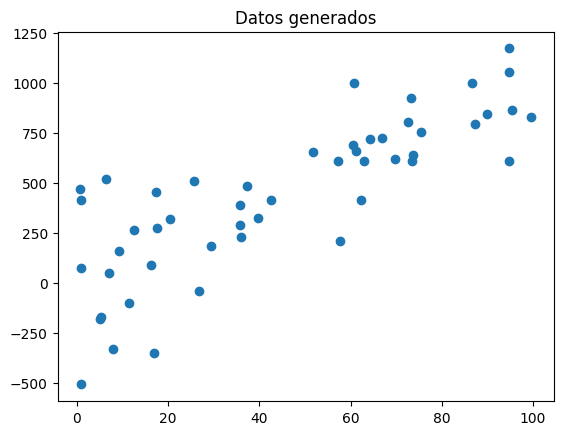

In [5]:
# Generador de distribución de datos para regresión lineal simple
def generador_datos_simple(beta, muestras, desviacion):
    # Genero n (muestras) valores de x aleatorios entre 0 y 100
    x = np.random.random(muestras) * 100
    # Genero un error aleatorio gaussiano con desviación típica (desviacion)
    e = np.random.randn(muestras) * desviacion
    # Obtengo el y real como x*beta + error
    y = x * beta + e
    return x.reshape((muestras,1)), y.reshape((muestras,1))

# Parámetros de la distribución
desviacion = 200
beta = 10 # Este es el valor que queremos estimar
n = 50
X, y = generador_datos_simple(beta, n, desviacion)

# Represento los datos generados
plt.scatter(X, y)
plt.title('Datos generados')
plt.show()


In [6]:
X = np.hstack([np.ones((n, 1)), X]) # Añado una columna de 1's para el término independiente

In [7]:
beta_est = beta_hat(X, y, bias=True) # Estimo los parámetros beta
beta_est

array([[-5.81798443],
       [ 9.88108303]])

Dado que teníamos una $\beta=10$ real, el estimador $\hat{\beta}$ parece bastante razonable

$$Y=\mathbf{x} \hat{\mathbf{\beta}}$$

In [8]:
y_pred = X @ beta_est

Graficando los valores de la predicción

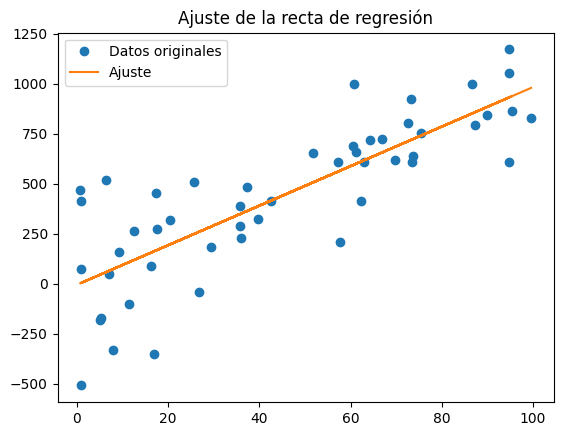

In [9]:
plt.plot(X[:,1], y, 'o', label='Datos originales')
plt.plot(X[:,1], y_pred, label='Ajuste')
plt.legend()
plt.title('Ajuste de la recta de regresión')
plt.show()

In [10]:
# Varianza de la variable aleatoria residual
var_epsilon(X, y, beta_est, bias=True)

np.float64(51546.915164269274)

In [11]:
# Varianza de los coeficientes estimados
var_beta_hat(X, y, beta_est, bias=True)

array([[ 3.14468321e+03, -4.69074531e+01],
       [-4.69074531e+01,  1.04095303e+00]])

Regresión con dos variables

In [12]:
def generador_datos_multiple(coeficientes, muestras, std_dev):
    # Calculamos el número de predictores y creamos una matriz 
    # con los coeficientes con p filas y 1 columna para 
    # multiplicación de matrices
    n_coeficientes = len(coeficientes)
    coef_matriz = np.array(coeficientes).reshape(n_coeficientes, 1)
    # Igual que en el caso de regresión lineal simple
    x = np.random.random_sample((muestras, n_coeficientes)) * 100
    epsilon = np.random.randn(muestras) * std_dev
    # Como x es una matriz muestras x n_coeficientes, y 
    # coef_matriz es n_coeficientes x 1
    # Podemos hacer multiplicación de matrices para obtener y 
    # dados x1,x2,...,xn necesitamos hacer la transpuesta 
    # para obtener un array 1xmuestras en lugar de muestrasx1 para 
    # usar la regresión
    y = np.matmul(x, coef_matriz).T + epsilon
    return x, y

# Genero los datos que ajustaré con la recta
coeficientes_reales =[10, 5] # Estos son los valores que queremos estimar
muestras = 200
std_dev = 100
X, y = generador_datos_multiple(coeficientes_reales, muestras, std_dev)

((200, 2), (1, 200))

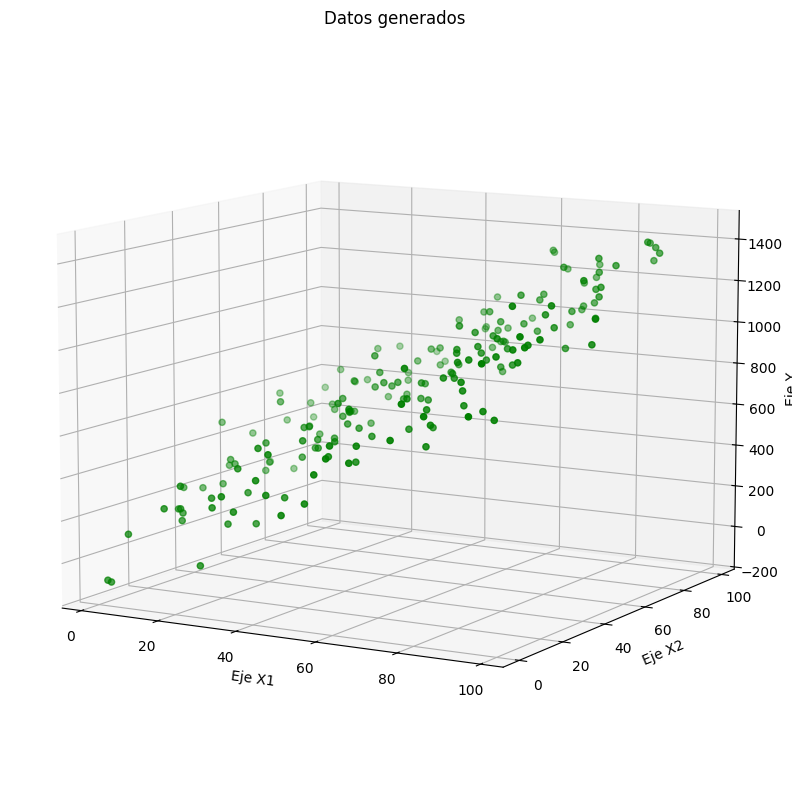

In [13]:
# Creating figure
fig = plt.figure(figsize = (15, 10))
# Creating plot
ax = plt.axes(projection ="3d")
ax.set_title('Datos generados')    
ax.scatter3D(X[:,0], X[:,1], y, color = "green")
ax.set_xlabel('Eje X1')
ax.set_ylabel('Eje X2')
ax.set_zlabel('Eje Y')
ax.view_init(10, )

# show plot
plt.show()

In [14]:
X = np.hstack([np.ones((200, 1)), X]) # Añado una columna de 1's para el término independiente

In [15]:
beta_est = beta_hat(X, y.T, bias=True) # Estimo los parámetros beta
beta_est

array([[-8.61699401],
       [ 9.78001315],
       [ 5.27752217]])

Dado que $\beta_1=10$ y $\beta_2=5$, los estimadores $\hat{\beta}_1$ y $\hat{\beta}_2$ parecen razonables.

In [16]:
y_pred = X @ beta_est

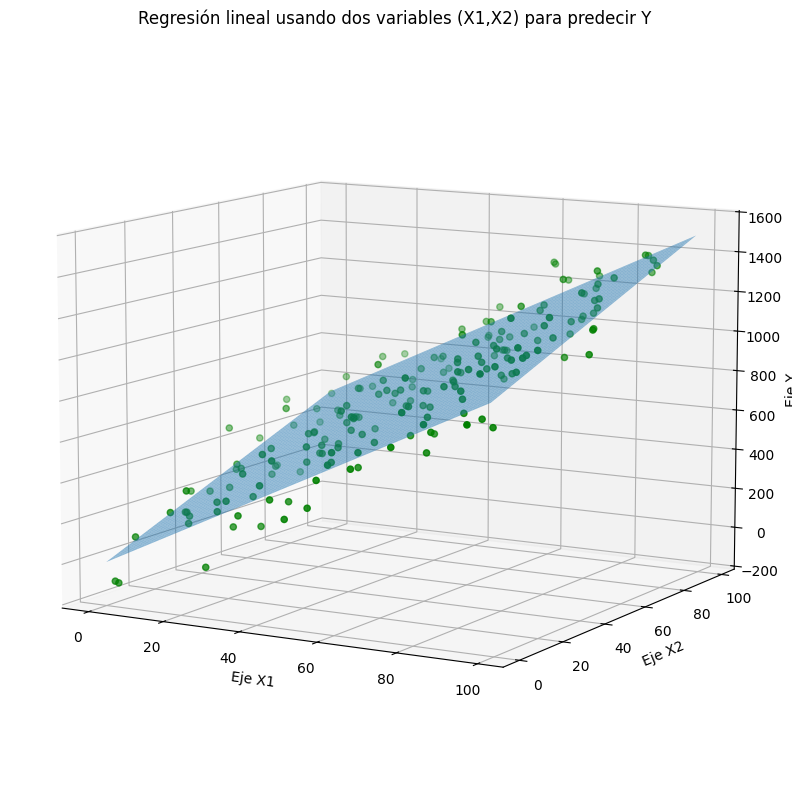

In [17]:
x1, x2 = np.meshgrid(range(100), range(100))
map_y = beta_est[1] * x1 + beta_est[2] * x2
# Creating figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(X[:,1], X[:,2], y, color = "green")
ax.set_title('Regresión lineal usando dos variables (X1,X2) para predecir Y')
ax.set_xlabel('Eje X1')
ax.set_ylabel('Eje X2')
ax.set_zlabel('Eje Y')
ax.view_init(10, )
ax.plot_surface(x1, x2, map_y, alpha=0.5)
# show plot
plt.show()

In [18]:
# Varianza de la variable aleatoria residual
var_epsilon(X, y, beta_est, bias=True)

np.float64(41703504.51818605)

In [19]:
# Varianza de los coeficientes estimados
var_beta_hat(X, y, beta_est, bias=True)

array([[ 1.49832444e+06, -1.36068644e+04, -1.19525766e+04],
       [-1.36068644e+04,  3.04561967e+02, -3.91633144e+01],
       [-1.19525766e+04, -3.91633144e+01,  2.80374708e+02]])